<img src="https://i.ibb.co/Jpjn0jV/logo.png" width="150" height="150" alt="">
<center>Nanyang Technological University <br>
School of Biological Sciences<br>
<a href="https://sbsbiohackathon.com/"><strong>Biohackathon Club </strong></a> </center>
<hr>
Created by: Chua Swee Kwang

<p>Before we start, Import pandas, numpy and read the CSV file and name the variable for the dataframe as df.</p>

### Datasets used
1. `diabetes.csv` from https://www.kaggle.com/saurabh00007/diabetescsv
      

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
#Import CSV files
df = pd.read_csv('diabetes.csv')

Before we start our analysis, look at the 1st 5 of the data to see if you have import them correctly.

In [3]:
# Look at the 1st to 5th row
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is good practice to do some preliminary analysis. <br>
Check the `shape`, `data type` and `Name of columns
`

In [4]:
# print the shape of the df
print(df.shape)

# print the dtypes of the df
print(df.dtypes)

# print the columns of the df
print(df.columns)

(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### Basic Statistical
`describe()` is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. 

1. Count number of non-NA/null observations.
2. Mean of the values.
3. Standard deviation of the observations.
4. Minimum of the values in the object.
5. Percentile of the values in the object.
6. Maximum of the values in the object.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### How? 
Too many variable / columns? But you only want to see only one such as BMI.


In [6]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

For categorical data, You can also check this
- `unique` represents the number of unique values of the column

- `top` represents the most frequent value in the column

- `freq` represents the count of the most frequent value in the column

In [7]:
# Import top-4-conditions-of-polyclinic-attendances.csv"
data_frame = pd.read_csv("top-4-conditions-of-polyclinic-attendances.csv")

# Using .describe()
data_frame["condition"].describe()

count                                                    52
unique                                                    4
top       Acute Upper Respiratory Tract Infection includ...
freq                                                     13
Name: condition, dtype: object

In [8]:
# Using .unique()
data_frame["condition"].unique()

array(['Hyperlipidemia', 'Hypertensive Disease',
       'Acute Upper Respiratory Tract Infection including Influenza',
       'Diabetes Mellitus'], dtype=object)

In [9]:
# Using .nunique()
data_frame["condition"].nunique()

4

## Filtering
The BMI, the greater the risk of developing additional health problems. 
1. A healthy weight is considered to be a BMI of 24 or less. 
2. A BMI of 25 to 29.9 is considered overweight. 
3. A BMI of 30 and above is considered obese.

Now, we only want to study obese people. So filter out the data and store it as bmi_30_df.

In [10]:
bmi_30_df = df.copy()
bmi_30_df = bmi_30_df[bmi_30_df["BMI"] >= 30]
bmi_30_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1


Use sum() to find the sum of all values in a column.

In [11]:
bmi_30_df.sum()

Pregnancies                  1897.000
Glucose                     59479.000
BloodPressure               33947.000
SkinThickness               11687.000
Insulin                     46124.000
BMI                         17252.400
DiabetesPedigreeFunction      235.359
Age                         15959.000
Outcome                       219.000
dtype: float64

Use min() to get the minimum value in a column.

In [12]:
bmi_30_df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                         30.000
DiabetesPedigreeFunction     0.085
Age                         21.000
Outcome                      0.000
dtype: float64

Use max() to get the maximum value in a column.

In [13]:
bmi_30_df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               114.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          70.00
Outcome                       1.00
dtype: float64

Use count() to find the number of records in a Series.

In [14]:
bmi_30_df.count()

Pregnancies                 472
Glucose                     472
BloodPressure               472
SkinThickness               472
Insulin                     472
BMI                         472
DiabetesPedigreeFunction    472
Age                         472
Outcome                     472
dtype: int64

### Measures of Central Tendency - Mean, Median, Mode

**Mean of a sample, $\bar{x}$**
The formula for this is

<img src="https://www.gstatic.com/education/formulas/images_long_sheet/mean.svg"  >

In [15]:
bmi_30_df["Age"].mean()

33.811440677966104

**Median of a sample** <br>
the median is the value separating the higher half from the lower half of a data sample (a population or a probability distribution)

In [16]:
bmi_30_df["Age"].median()

30.0

**Mode of a sample** <br>
The mode of a set of data values is the value that appears most often.

In [17]:
bmi_30_df["Age"].mode()

0    24
dtype: int64

<div class="alert alert-info">
<b>DATA Visualization: </b> In this workshop, we will not be learning about data visualization.
</div>

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import norm
sns.set()

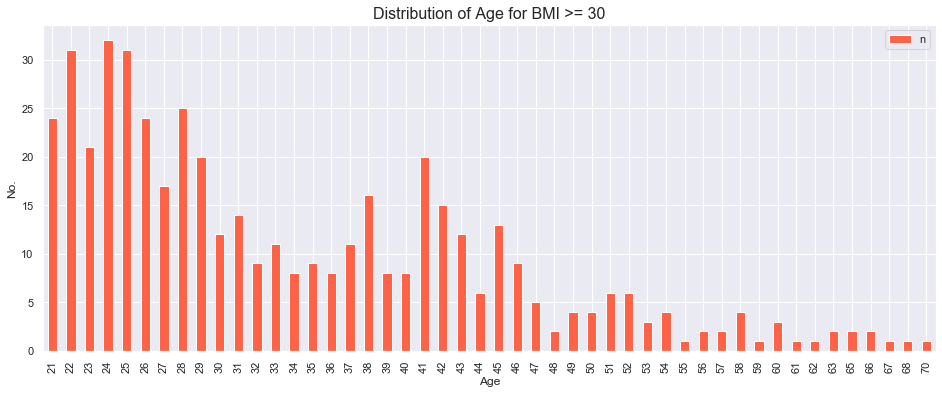

In [19]:
df_p_agg = bmi_30_df.groupby('Age').size().reset_index(name='n')
fig, ax = plt.subplots()
df_p_agg.plot(kind='bar', x='Age', y='n', ax=ax, figsize=(16, 6), color='tomato',)
ax.set_ylabel("No.")
ax.set_xlabel("Age")
plt.title("Distribution of Age for BMI >= 30", fontsize=16)
plt.show()

### Variance, Standard Deviation

**Variance, $\sigma^2$** <br>
Variance is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of numbers are spread out from their average value.

<img src="https://images.deepai.org/glossary-terms/variance-6302132.jpg" width="400px">

`axis=0` as you are calculating the variance of a column. `axis=1` will represent calculating across a row.


In [20]:
bmi_30_df["Age"].var(axis=0)

118.48453974594263

**Standard Deviation, $\sigma$** <br>
Standard deviation is a measure of the amount of variation or dispersion of a set of values <br>
<img src="https://cdn.kastatic.org/googleusercontent/N8xzWFc6eo0XBHEXZjz1SwvLSnPezvhTRF1P17kdjUG_tnJivGKkyCxbwVe4MZ0-USOxIZBohgcjdi8e7Z4Hswcqfw" width="400px">

In [21]:
bmi_30_df["Age"].std(axis=0)

10.885060392388397

In [22]:
bmi_30_df["Age"].std(axis=0)**2 

118.48453974594264

### Skewness

Use `Series.skew()` to find the skewness of the dataset. This will mean if the dataset is left-tailed or right-tailed. 

<img src="https://miro.medium.com/max/1200/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg" width="600px">


Interpret the skewness score as follows:
- If the skewness is $0$ then the observations are symmetrical. 
- If the skewness is positive $(>0)$ then the dataset is skewed right (right-tailed). 
- If the skewness is negative $(<0)$then the dataset is left-skewed (left-tailed).

In [23]:
bmi_30_df["Age"].skew()

0.9276458499452075

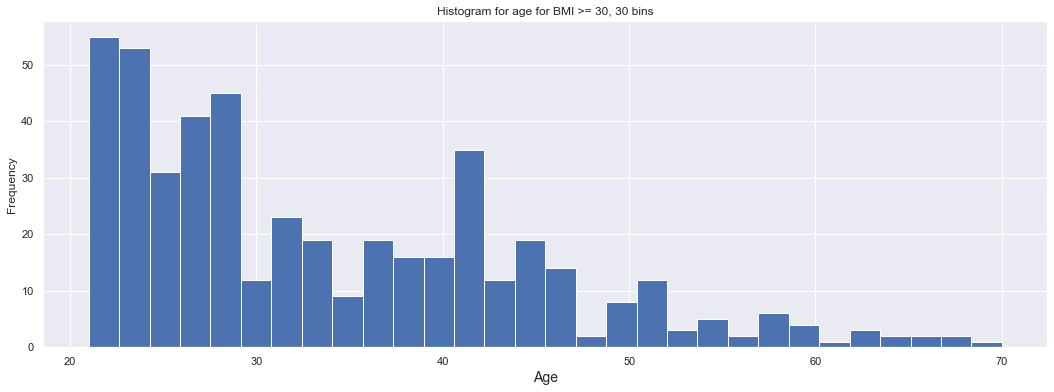

In [28]:
plt.figure(figsize=(18, 6))
ax1 = plt.subplot(111)
bmi_30_df["Age"].plot(kind='hist', bins=30 , ax=ax1)
ax1.set_xlabel("Age", fontsize=14)
plt.title("Histogram for age for BMI >= 30, 30 bins")
plt.show()

###  Kurtosis

Use `Series.kurt()` to find the kurtosis score of the dataset. <br>
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

<img src="https://financetrain.com/assets/KurtosisPict.jpg" width="600px">

Interpret the skewness score as follows:
1. if the observations have excessively fat tails, the kurtosis is positive.
2. The kurtosis of a normal distribution is $0$. 
3. If the observations a very light tail, then the kurtosis is negative.

In [25]:
bmi_30_df["Age"].kurt()

0.23863895978841532

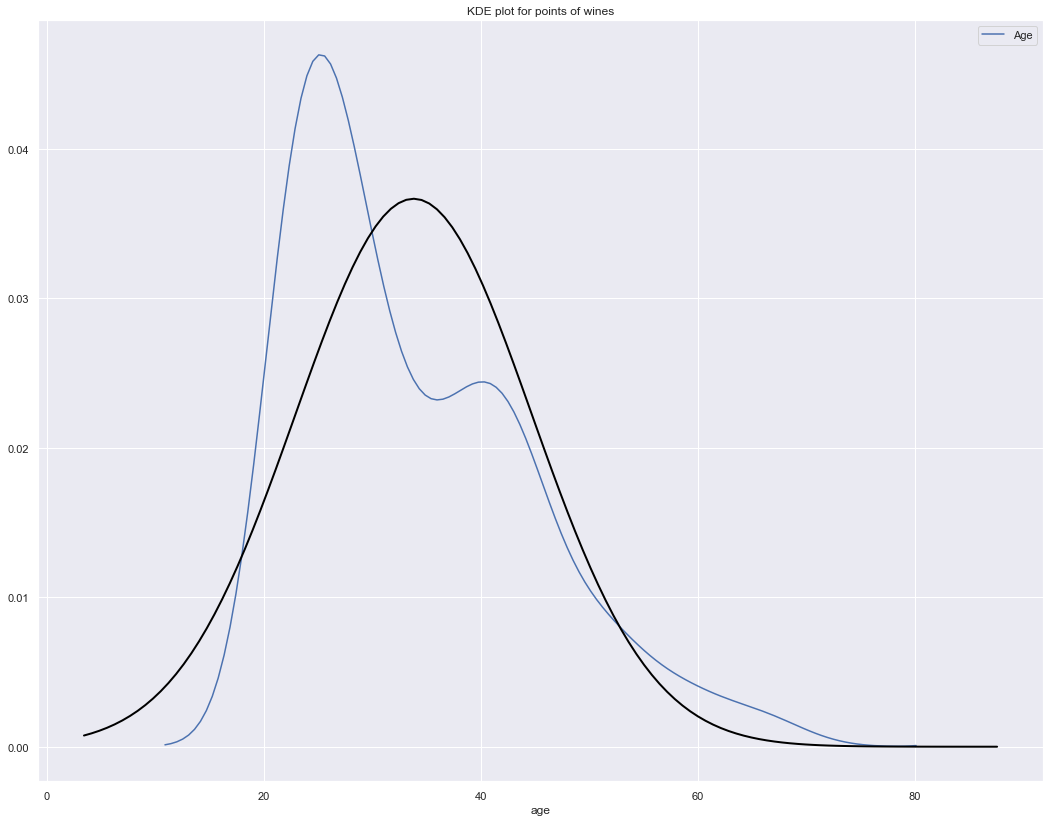

In [27]:

plt.figure(figsize=(18, 14))
ax1 = plt.subplot(111)
sns.kdeplot(bmi_30_df["Age"])
ax1.set_xlabel("age")
plt.title("KDE plot for points of wines")
xmin, xmax = plt.xlim()

x = np.linspace(xmin-4, xmax+4, 120)
p = norm.pdf(x, bmi_30_df["Age"].mean(), bmi_30_df["Age"].std())
plt.plot(x, p, 'k', linewidth=2, color='black')
plt.show()